In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(df.apply(lambda col: col.unique()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

array([<Axes: title={'center': 'No'}>, <Axes: title={'center': 'Yes'}>],
      dtype=object)

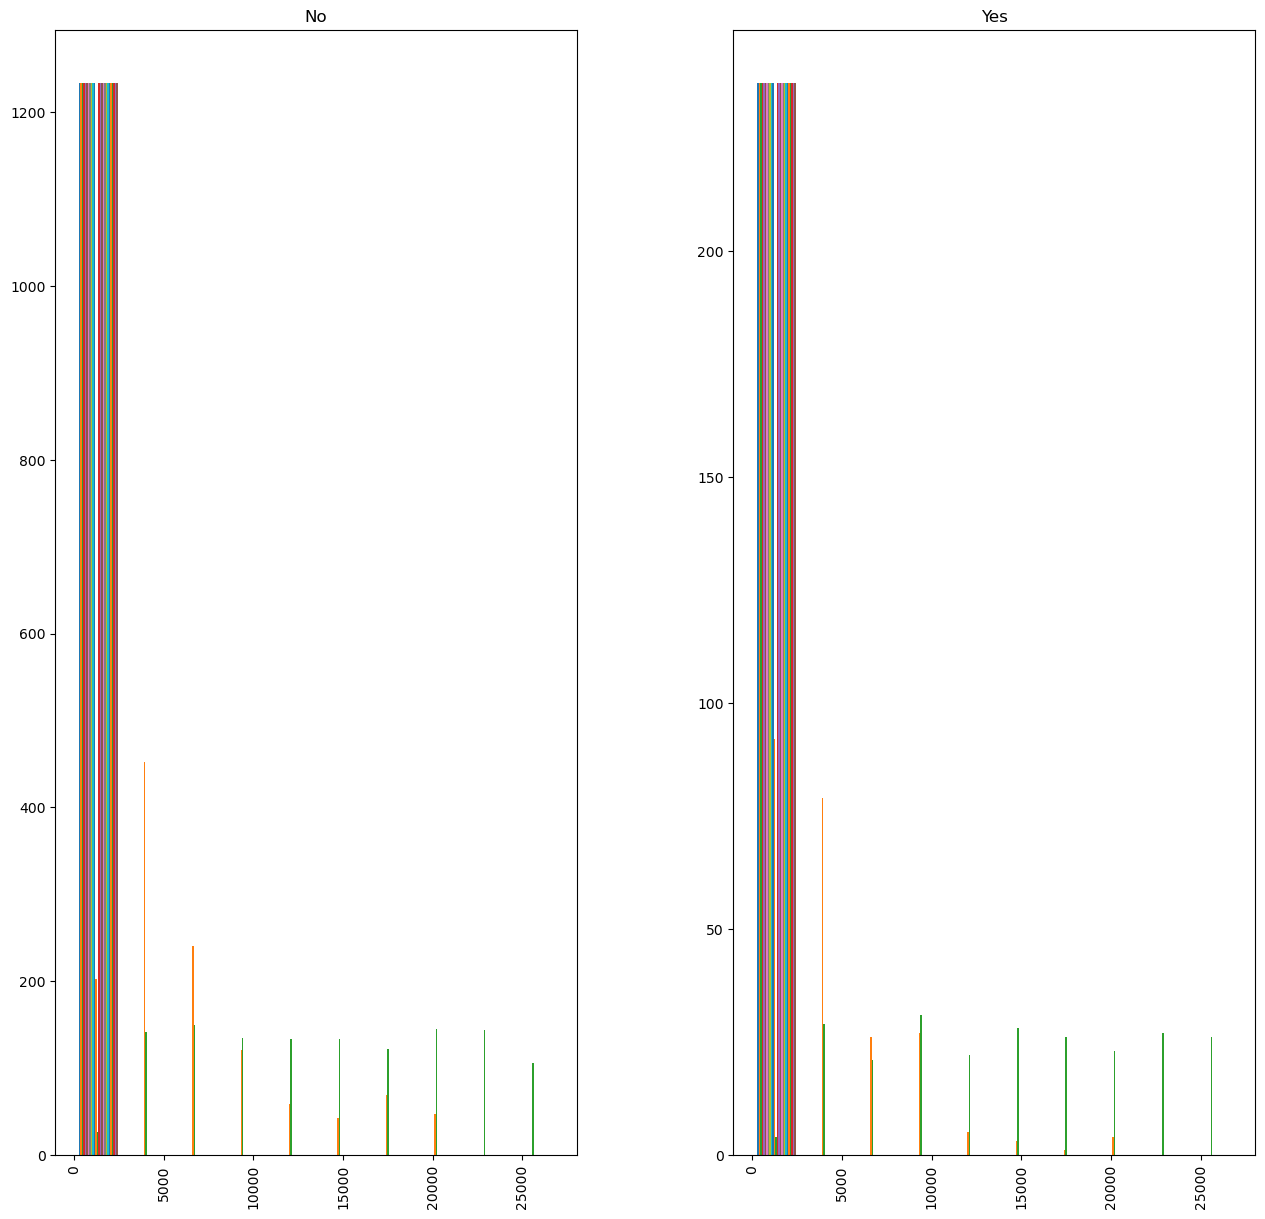

In [6]:
df.hist(figsize=(15,15),by="Attrition")

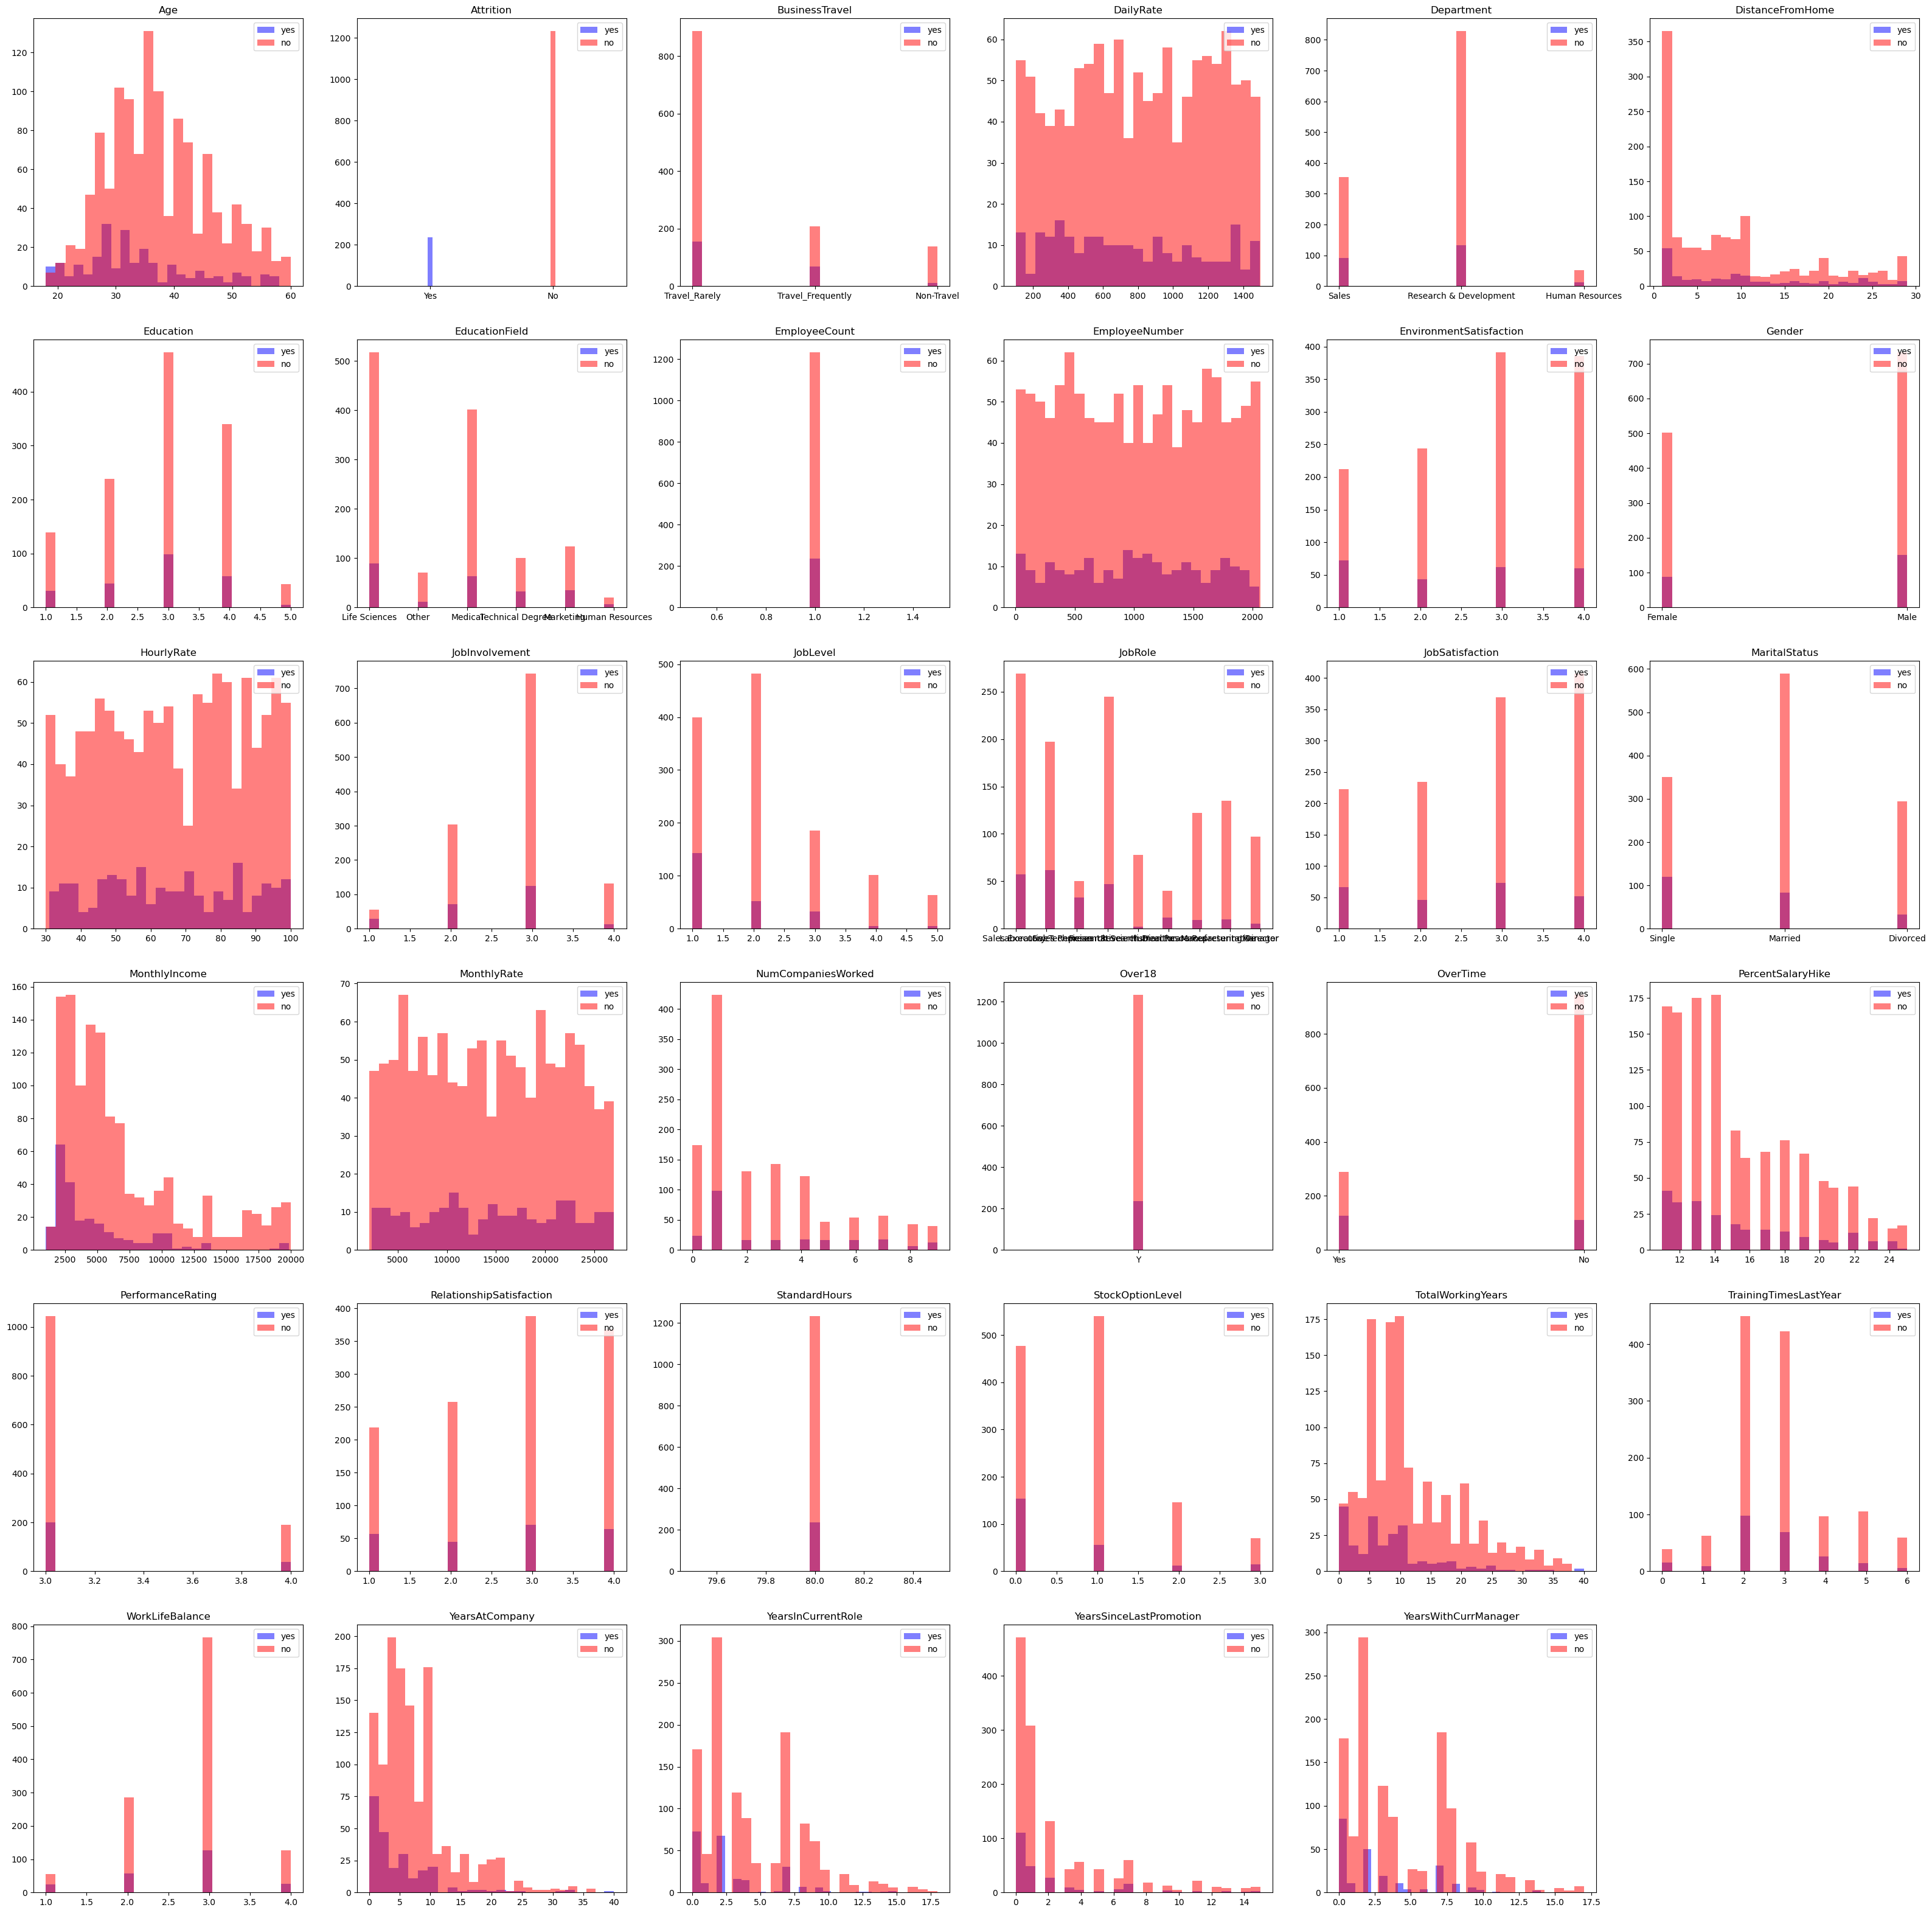

In [7]:
k=1
plt.figure(figsize=(40, 40))
for col in df:
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

Columns 'EmployeeCount','Over18','StandardHours' has only 1 unique value and hence can be dropped. Employee number is varying for each and hence does not provide any value in the predicttion. Hence it should be dropped too.

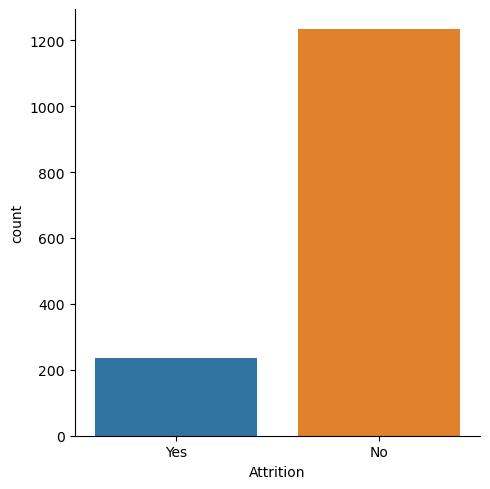

In [8]:
sns.catplot(data=df,x="Attrition",kind='count')

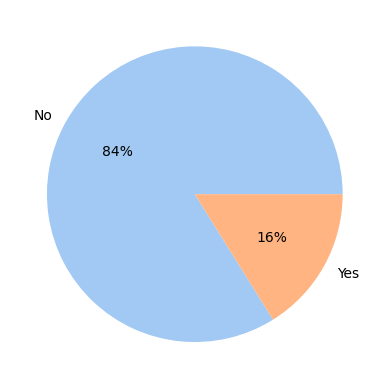

In [9]:
colors = sns.color_palette("pastel", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',colors=colors)
plt.show()

Text(0.5, 1.0, 'Stacked Bar Chart of Job satisfaction vs attrition')

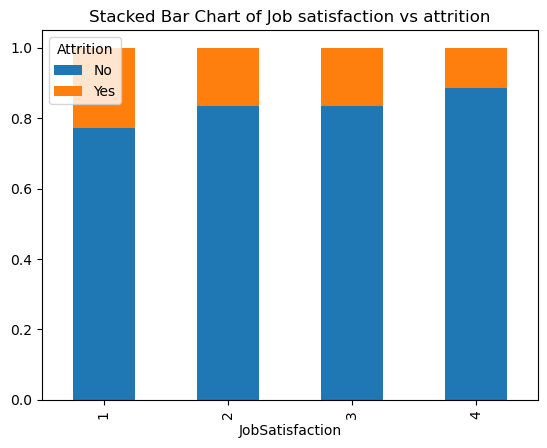

In [10]:
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job satisfaction vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Overtime vs attrition')

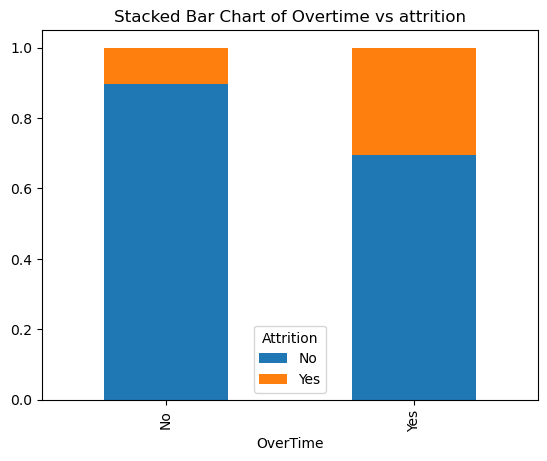

In [11]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

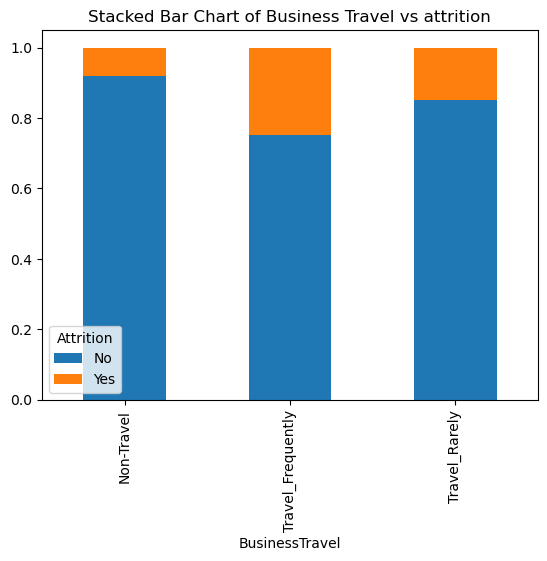

In [12]:
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

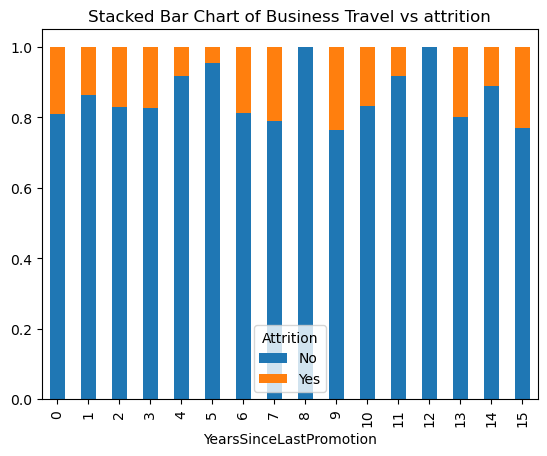

In [13]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

We don't have many datapoints for the attrition =1. 

C:\Users\harsh\AppData\Local\Temp\ipykernel_17812\3950304246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')


<Axes: >

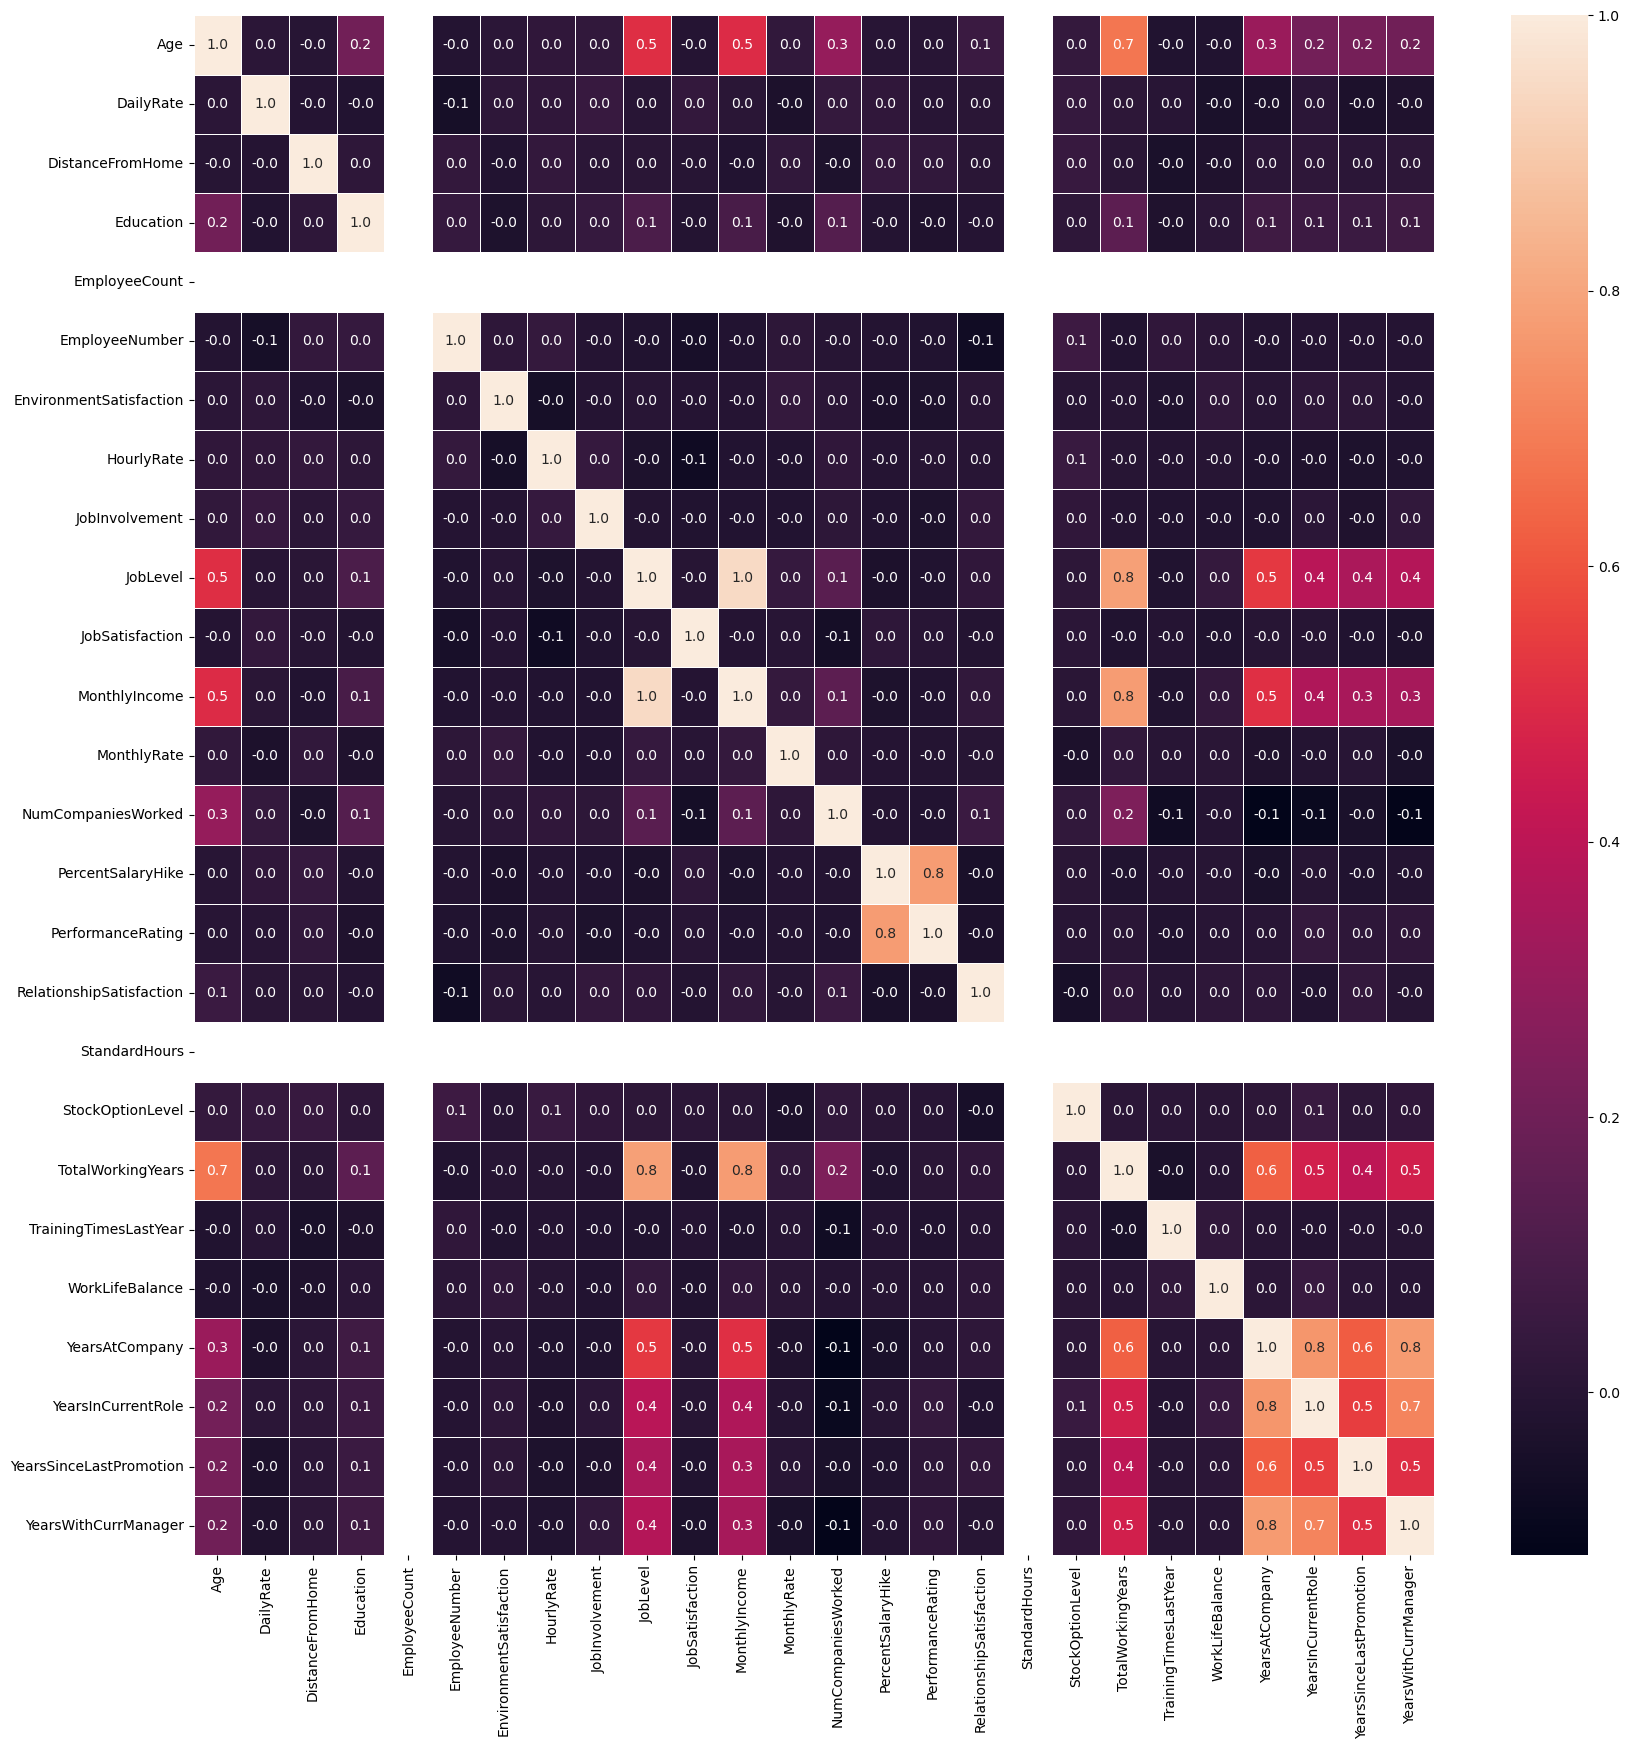

In [14]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

In [15]:
#df[['Education_Level','Pay_Scale']].apply(pd.Series.value_counts)
df.groupby(['TotalWorkingYears','YearsSinceLastPromotion']).size().unstack(fill_value=0)

YearsSinceLastPromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TotalWorkingYears,,,,,,,,,,,,,,,,
0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,70,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,3,19,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,14,13,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,18,20,2,0,0,0,0,0,0,0,0,0,0,0,0
5,50,25,7,4,2,0,0,0,0,0,0,0,0,0,0,0
6,43,61,13,2,6,0,0,0,0,0,0,0,0,0,0,0
7,45,18,12,0,1,3,0,2,0,0,0,0,0,0,0,0
8,44,27,11,3,1,1,1,15,0,0,0,0,0,0,0,0


# Hourly, monthly and weekly rates are given. Only hourly rate should do the job!!!!


<Axes: xlabel='JobRole', ylabel='count'>

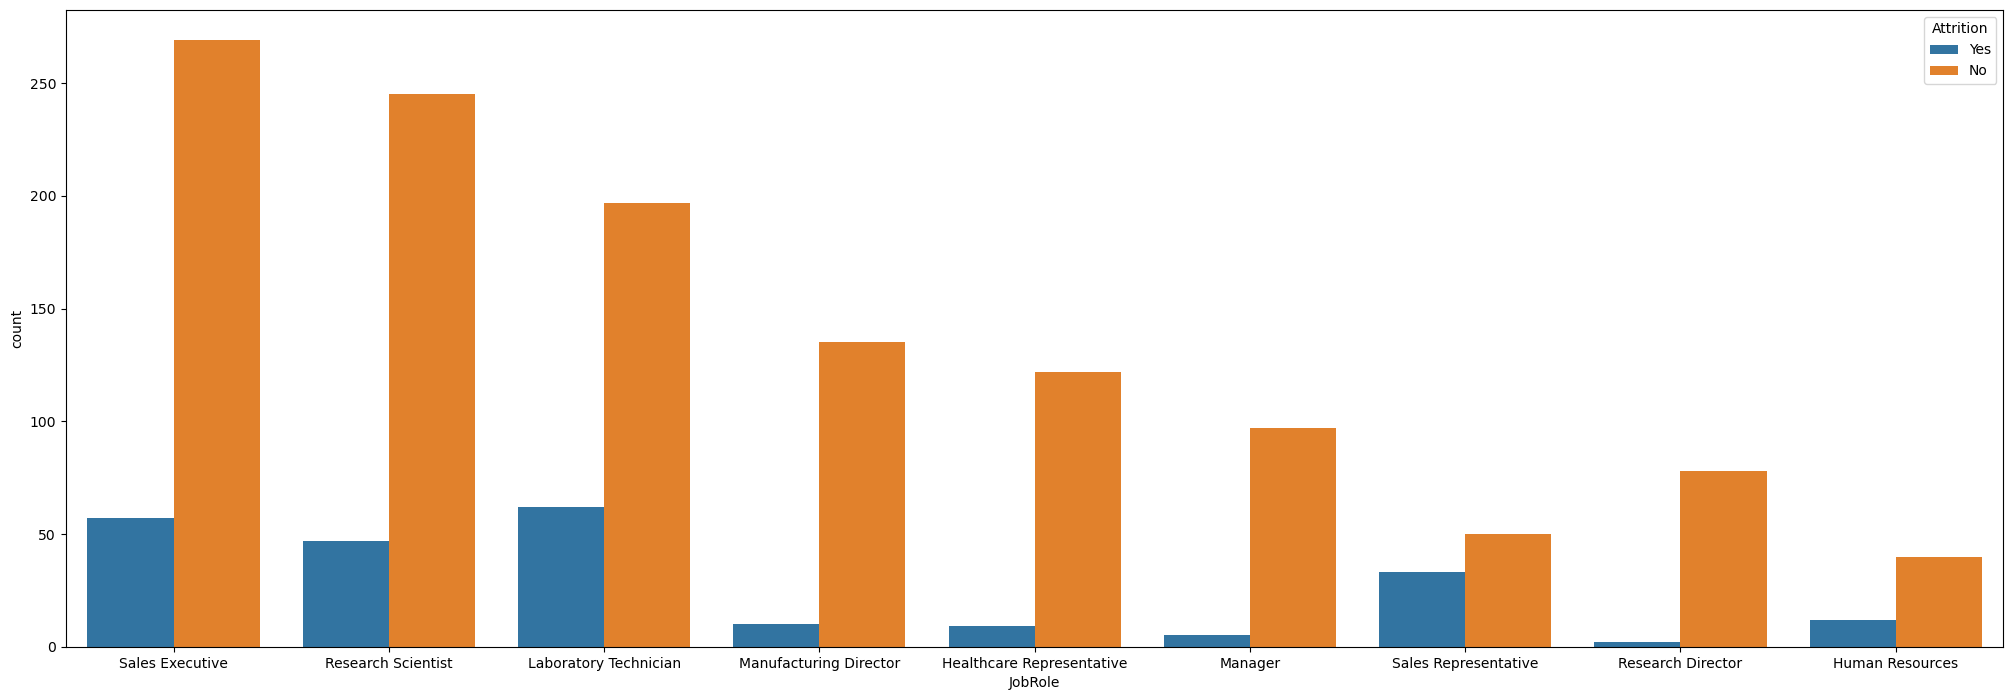

In [16]:
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="JobRole",hue="Attrition", ax=ax )

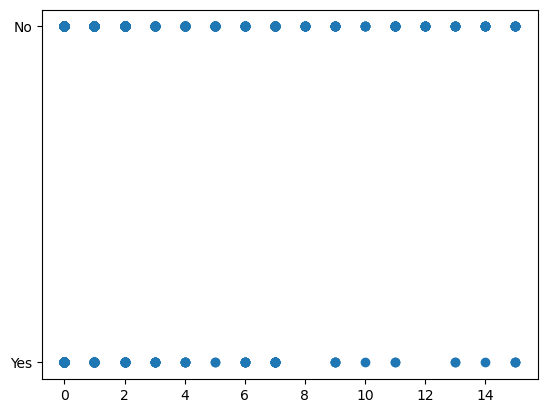

In [17]:
plt.scatter(df['YearsSinceLastPromotion'],df['Attrition'])

<Figure size 1500x1500 with 0 Axes>

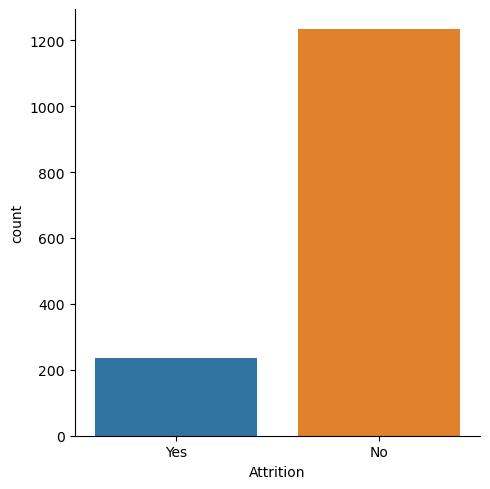

<Figure size 1500x1500 with 0 Axes>

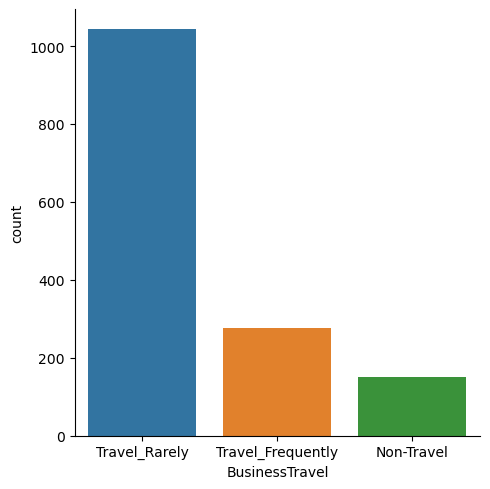

<Figure size 1500x1500 with 0 Axes>

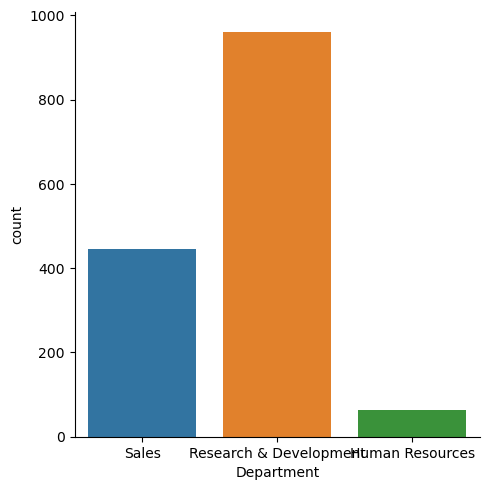

<Figure size 1500x1500 with 0 Axes>

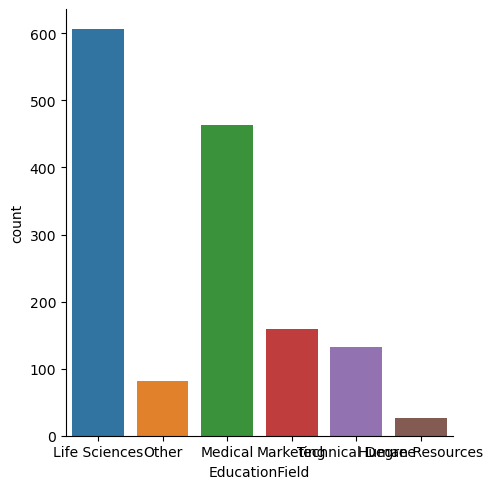

<Figure size 1500x1500 with 0 Axes>

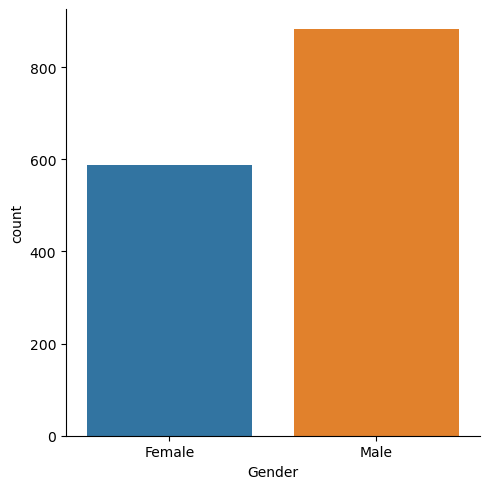

<Figure size 1500x1500 with 0 Axes>

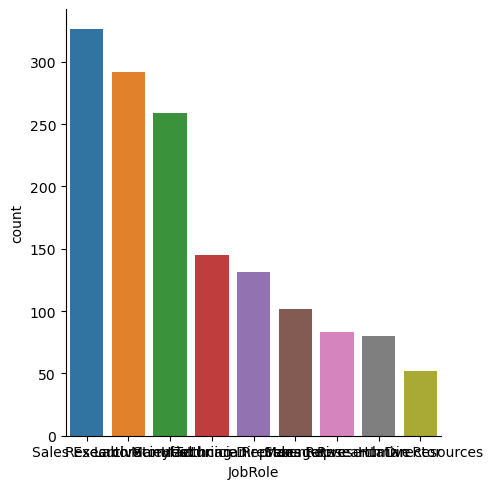

<Figure size 1500x1500 with 0 Axes>

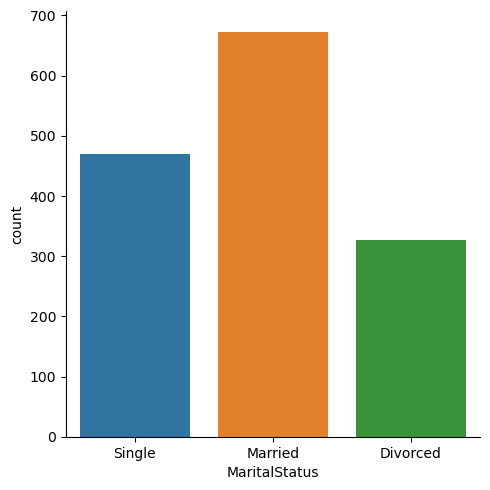

<Figure size 1500x1500 with 0 Axes>

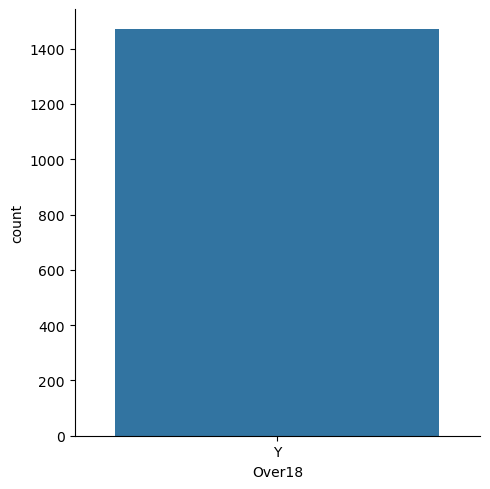

<Figure size 1500x1500 with 0 Axes>

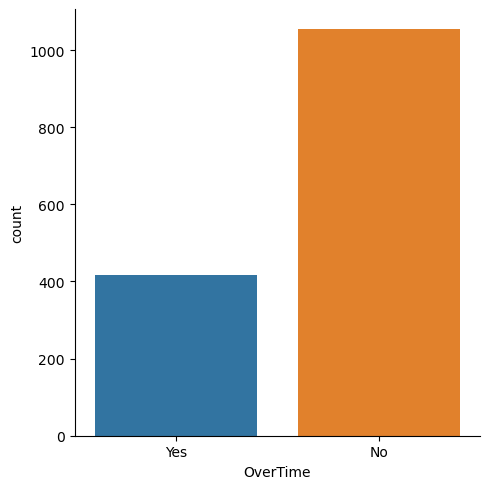

In [18]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=df,x=i,kind='count')

In [19]:
#missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:

#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [22]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,Y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,Y)
X2 = pd.DataFrame(X_,columns=X.columns)

# UnderSampling

In [24]:
X=X1
Y=Y1

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Two PCs explain [ 17.25880242  24.10291314  30.37131137  35.93786711  40.93144827
  45.55383789  49.54134683  53.49532689  57.35022215  61.06698758
  64.64838913  68.08897262  71.30312644  74.42474255  77.47438525
  80.43537835  83.18882794  85.72604388  88.02815577  90.27657557
  92.46593119  94.12575527  95.48462761  96.5161084   97.48108182
  98.20885988  98.85246267  99.46561429  99.87127071 100.        ] % of variance cumulatively


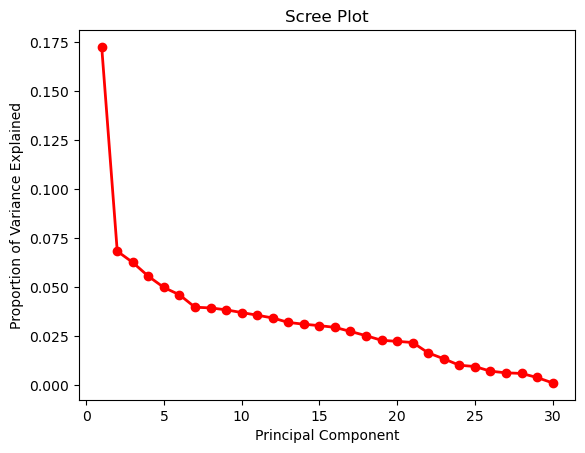

In [26]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
standard_scaler = StandardScaler()
principalComponents = pca.fit_transform(standard_scaler.fit_transform(x_train))
# print(pca.explained_variance_ratio_)
print('Two PCs explain', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.71149028 0.28616394]
Two PCs explain  99.76542171370907 % of variance cumulatively


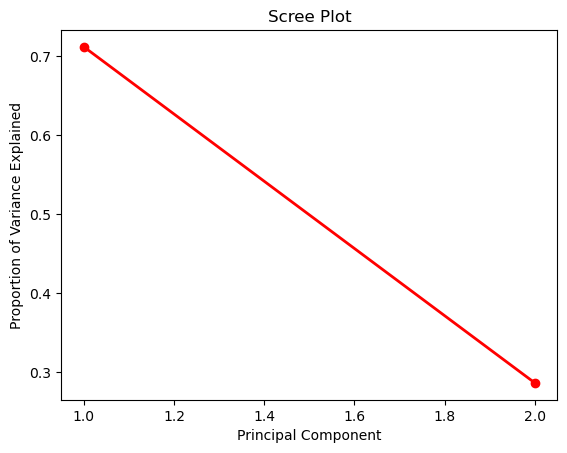

In [27]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(x_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [28]:
x_train = principalComponents
x_test = pca.transform(x_test)

In [29]:
from sklearn.naive_bayes import ComplementNB,GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [30]:
print(x_test.shape)

(95, 2)


In [31]:
predicted=model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[13, 33],
       [11, 38]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report,accuracy_score,precision_score
print(classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.54      0.28      0.37        46
           1       0.54      0.78      0.63        49

    accuracy                           0.54        95
   macro avg       0.54      0.53      0.50        95
weighted avg       0.54      0.54      0.51        95

0.5368421052631579
0.5352112676056338


In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ",np.mean(scores['test_accuracy']))
  print("Precision: ",np.mean(scores['test_precision']))
  print("Recall: ",np.mean(scores['test_recall']))
  print("F1 Score: ",np.mean(scores['test_f1']))

In [35]:
cross_validation(GaussianNB(),X,Y)

{'fit_time': array([0.01562071, 0.        , 0.        , 0.00654268, 0.        ]), 'score_time': array([0.        , 0.01127195, 0.02833605, 0.01086211, 0.0166986 ]), 'test_accuracy': array([0.63157895, 0.72631579, 0.65263158, 0.62105263, 0.63829787]), 'test_precision': array([0.59375   , 0.6779661 , 0.62711864, 0.60344828, 0.61818182]), 'test_recall': array([0.80851064, 0.85106383, 0.77083333, 0.72916667, 0.72340426]), 'test_f1': array([0.68468468, 0.75471698, 0.69158879, 0.66037736, 0.66666667])}
Accuracy:  0.6539753639417694
Precision:  0.6240929679613199
Recall:  0.776595744680851
F1 Score:  0.6916068952041444


# Oversampling


In [36]:
X=X2
Y=Y2

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Two PCs explain [ 16.6548815   23.54698971  29.79164276  35.24074114  40.22137423
  44.45150583  48.29451093  52.11118481  55.80760672  59.41395136
  62.90135179  66.3122197   69.6120394   72.78335339  75.88220997
  78.869297    81.80061652  84.55854895  87.21286509  89.81505908
  92.21269931  93.85016778  95.36913862  96.40565646  97.30791757
  98.08558945  98.78289634  99.42853251  99.85071133 100.        ] % of variance cumulatively


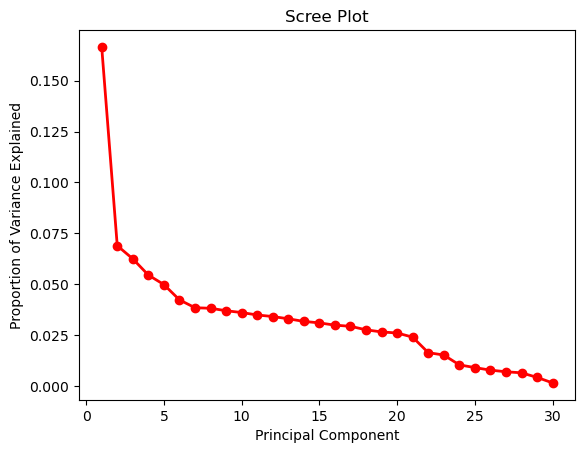

In [38]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
standard_scaler = StandardScaler()
principalComponents = pca.fit_transform(standard_scaler.fit_transform(x_train))
# print(pca.explained_variance_ratio_)
print('Two PCs explain', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.7224271  0.27527423]
Two PCs explain  99.77013369328883 % of variance cumulatively


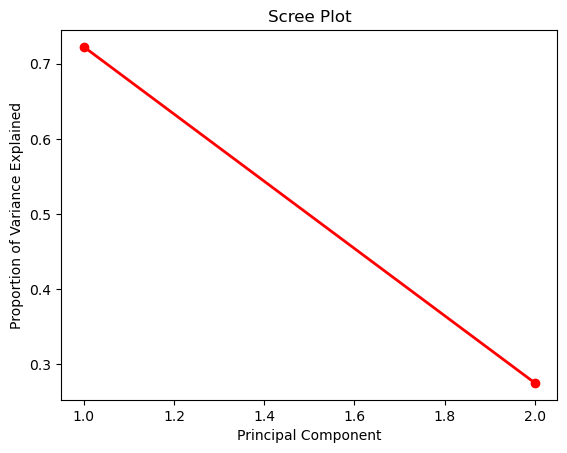

In [39]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(x_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [40]:
x_train = principalComponents
x_test = pca.transform(x_test)

In [41]:
from sklearn.naive_bayes import ComplementNB,GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [42]:
print(x_test.shape)

(494, 2)


In [43]:
predicted=model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[ 74, 163],
       [ 46, 211]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report,accuracy_score,precision_score
print(classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41       237
           1       0.56      0.82      0.67       257

    accuracy                           0.58       494
   macro avg       0.59      0.57      0.54       494
weighted avg       0.59      0.58      0.55       494

0.5769230769230769
0.5641711229946524


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ",np.mean(scores['test_accuracy']))
  print("Precision: ",np.mean(scores['test_precision']))
  print("Recall: ",np.mean(scores['test_recall']))
  print("F1 Score: ",np.mean(scores['test_f1']))

In [47]:
cross_validation(GaussianNB(),X,Y)

{'fit_time': array([0.01389217, 0.00989461, 0.0114677 , 0.00500011, 0.00373793]), 'score_time': array([0.02506495, 0.02155924, 0.02023745, 0.01934743, 0.02850938]), 'test_accuracy': array([0.68825911, 0.663286  , 0.67545639, 0.68965517, 0.68356998]), 'test_precision': array([0.65979381, 0.64516129, 0.6407767 , 0.65448505, 0.64705882]), 'test_recall': array([0.77732794, 0.72874494, 0.80161943, 0.80081301, 0.80487805]), 'test_f1': array([0.71375465, 0.68441065, 0.71223022, 0.7202925 , 0.7173913 ])}
Accuracy:  0.6800453309901372
Precision:  0.649455135429599
Recall:  0.7826766729205753
F1 Score:  0.709615863594706
